In [12]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt

# const
BINS = 20

# helper functions
def dice_roll(size):
    """ roll the d6, duh! """
    result = []
    for _ in range(size):
        result.append(random.randint(1,6))
    return result

def compute_bins(n_bins, input_df, target_column):
    """ compute the data slices for every bin """
    d = {}
    step = (max(input_df[target_column]) - min(input_df[target_column])) / n_bins
    for i in range(n_bins+1):
        d[i+1] = (round(min(input_df[target_column]) + i*step, 2), 
                  round(min(input_df[target_column]) + (i+1)*step, 2))
    return d


def in_range(inp, range):
    """ helper float comparison """
    return inp >= range[0] and inp < range[1]

def prepare_frequency_table(n_bins, df, target, value_mapper):
    count = []
    for i in range(1, n_bins+1):
        count.append(df[target][df[target].apply(lambda x: in_range(x, value_mapper[i]))].count())
    data = {'bin_number': [i for i in range(1, n_bins+1)], 
            'value': [value_mapper[i] for i in range(1, n_bins+1)],
            'count': count}
    return pd.DataFrame.from_dict(data)

def gen_studet(degree_freedom, size):
    return pd.DataFrame({'observation': np.random.standard_t(degree_freedom, size=size)})

def gen_binom(n, p):
    return pd.DataFrame({'observation': np.random.binomial(n, p, 10000)})
    
def gen_weibull(alpha):
    # shape > 1 -> p increases, < 1 -> decreases
    return pd.DataFrame({'observation': np.random.weibull(alpha, 10000)})

def gen_poisson(l, size):
    return pd.DataFrame({'observation':np.random.poisson(l, size)})

def gen_exp(l):
    return pd.DataFrame({'observation': np.random.exponential(scale=1 / l, size=10000)}) 

def gen_normal(m, sigma, size):
    return pd.DataFrame({'observation':np.random.normal(m, sigma, size)})

def generate_distribution(name):
    """ generate df from random.distribution of a defined type """
    if name == "normal":
        return gen_normal(0.0, 1.0, 10000)
    elif name == "binom":
        return gen_binom(10, 0.5)
    elif name == "poisson":
        return gen_poisson(2.5, 100)
    elif name == "exp":
        # beta  = frequency over frame. lambda - rate of event per interal
        return gen_exp(0.2)
    elif name == "student":
        return gen_studet(5, 10000)
    elif name == "weibull":
        return gen_weibull(5.0)
    else:
        return pd.DataFrame({'observation': []})
    



# Let's find out what distribution our data is

In the data folder we have 4 datasets, load them and check what distributions they are

In [19]:
data1 = pd.read_csv('data/StudentsPerformance.csv')
data2 = pd.read_csv('data/StudentsPerformance.csv')['writing score']
data3 = pd.read_csv('data/open-data-website-traffic.csv')['Socrata Sessions']
data4 = pd.read_csv('data/open-data-website-traffic.csv')['Socrata Bounce Rate']
data5 = pd.read_csv('data/HorseKicksDeath.csv')['C1']

In [20]:
# Tasks: 
what_is_this_distirution_1 = data1["math score"]
what_is_this_distirution_1.head(10)

0    72
1    69
2    90
3    47
4    76
5    71
6    88
7    40
8    64
9    38
Name: math score, dtype: int64

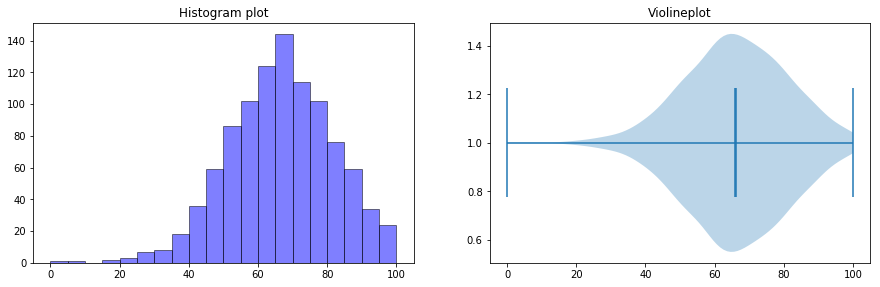

In [21]:
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(what_is_this_distirution_1, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(what_is_this_distirution_1, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

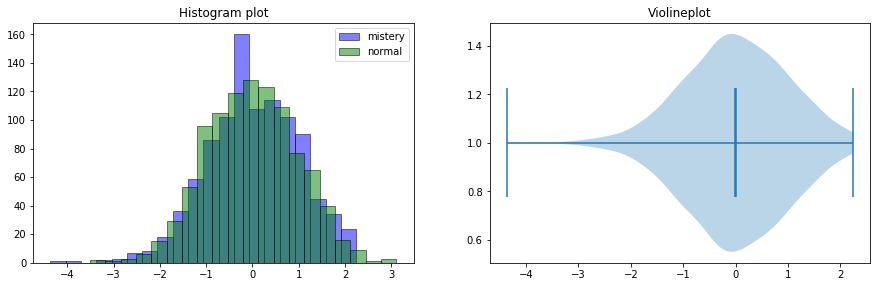

In [23]:
mu = np.mean(what_is_this_distirution_1)
sigma = np.std(what_is_this_distirution_1)
what_is_this_distirution_1_normalized = what_is_this_distirution_1.apply(lambda x: (x - mu)/sigma)
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(what_is_this_distirution_1_normalized, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.hist(gen_normal(0, 1, 1000)['observation'], bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('mistery','normal'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(what_is_this_distirution_1_normalized, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

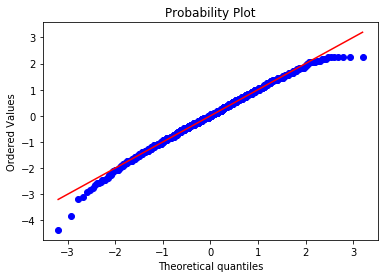

In [5]:
qq = stats.probplot(what_is_this_distirution_1_normalized, plot=plt)

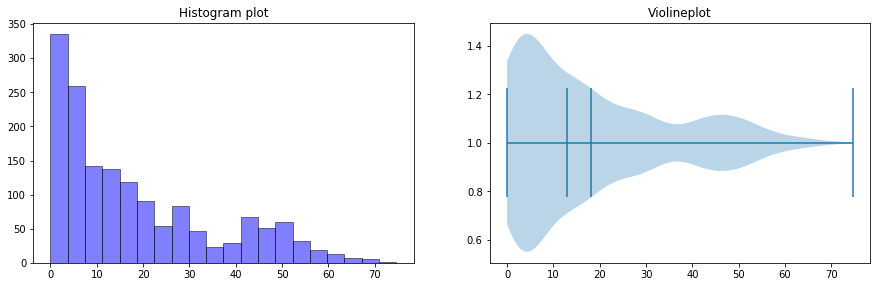

In [7]:
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(data4, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(data4, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()

In [18]:
#Looking at the second data set..
what_is_this_distirution_2 = data2
what_is_this_distirution_2.head(10)

0    74
1    88
2    93
3    44
4    75
5    78
6    92
7    39
8    67
9    50
Name: writing score, dtype: int64

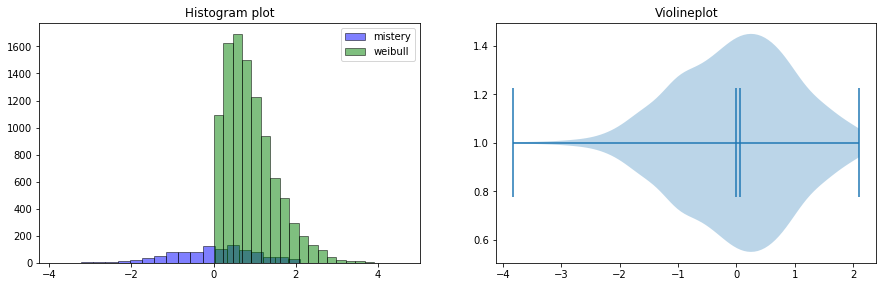

In [25]:
mu = np.mean(what_is_this_distirution_2)
sigma = np.std(what_is_this_distirution_2)
what_is_this_distirution_2_normalized = what_is_this_distirution_2.apply(lambda x: (x - mu)/sigma)
fig = plt.figure(figsize=(15, 15)) 
plt.subplot(321)
plt.title("Histogram plot")
plt.hist(what_is_this_distirution_2_normalized, bins=BINS, alpha=0.5, label='poisson', color='b', edgecolor='k')
plt.hist(gen_weibull(1.5)['observation'], bins=BINS, alpha=0.5, label='normal', color='g', edgecolor='k')
plt.gca().legend(('mistery','weibull'))
plt.subplot(322)
plt.title("Violineplot")
plt.violinplot(what_is_this_distirution_2_normalized, vert=False, widths=0.9, showmeans=True, showextrema=True, showmedians=True)
plt.show()